<a href="https://colab.research.google.com/github/juacastanori/SyS/blob/main/SLIT_Convolucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EJERCICIOS CONVOLUCION
##JUAN JERONIMO CASTAÑO RIVERA

**Ejemplo**

La convolución $y(t) = x(t) * h(t)$ se realizará a partir de las siguientes señales

\begin{align}
h(t) &= e^{-t} \\
x(t) &= \text{rect} \left(t - \frac{1}{2}\right)
\end{align}


In [42]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, tau = sym.symbols('t tau', real=True)#variables simbólicas

In [43]:
class rect(sym.Function): #función pulso rectangular
    @classmethod
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)

In [44]:
def plot_signals(x_axis, x, h, ylabel, xlabel):#función para graficar convolución
    p1 = sym.plot(x, (x_axis, -5, 5), show=False, line_color='b', ylabel=ylabel, xlabel=xlabel)
    p2 = sym.plot(h, (x_axis, -5, 5), show=False, line_color='r')
    p1.extend(p2)
    p1.show()

Ahora vamos a definir y trazar las señales. A continuación, la señal $h(t)$ se ilustra mediante el gráfico rojo y la señal $x(t)$ mediante el gráfico azul.

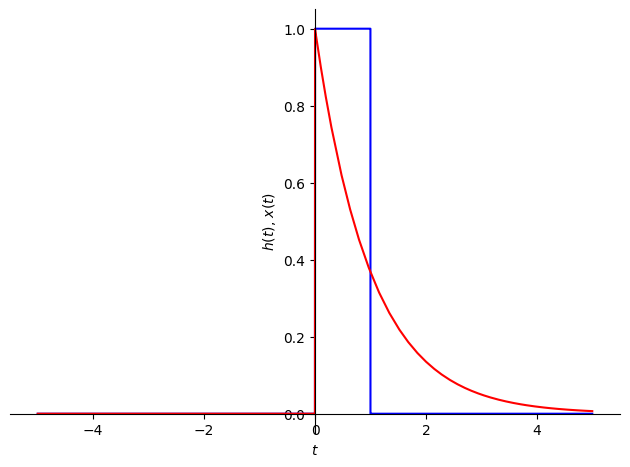

In [45]:
h = sym.exp(-t) * sym.Heaviside(t)
x = rect(t - 1/2)

plot_signals(t, x, h, r'$h(t)$, $x(t)$', r'$t$')

 El **primer paso** es sustituir $t$ por $\tau$ para obtener $h(\tau)$ y $x(\tau)$. Observe que el eje independiente ahora representa a $\tau$.

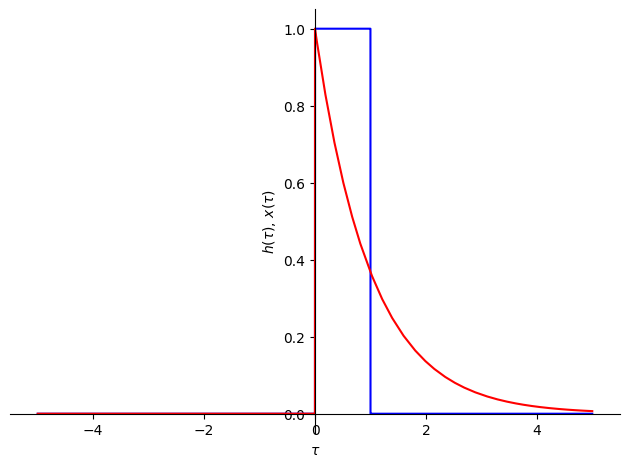

In [46]:
h1 = h.subs(t, tau)
x1 = x.subs(t, tau)

plot_signals(tau, x1, h1, r'$h(\tau)$, $x(\tau)$', r'$\tau$')

El **segundo paso** es reflejar $h(\tau)$ para obtener $h(-\tau)$

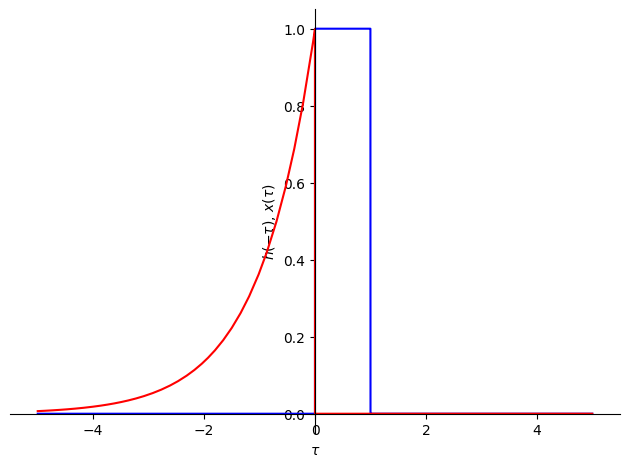

In [47]:
h2 = h1.subs(tau, -tau)

plot_signals(tau, x1, h2, r'$h(-\tau)$, $x(\tau)$', r'$\tau$')

La respuesta al impulso $h(-\tau)$ se desplaza por $t$ a la derecha en el **tercer paso** para obtener $h(t - \tau)$. Esto se ilustra para $t = -2$

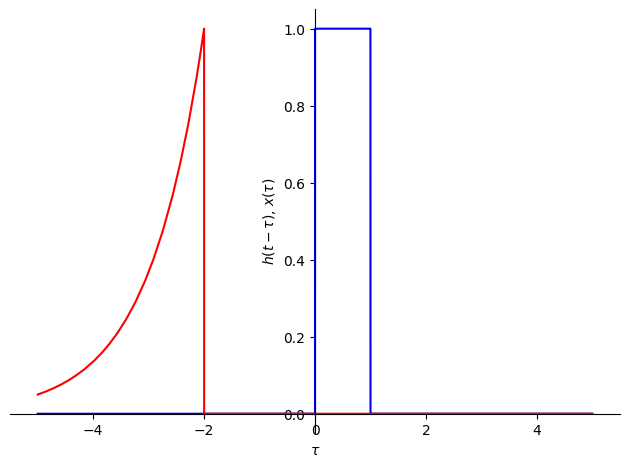

In [48]:
h3 = h2.subs(tau, tau-t)

plot_signals(tau, x1, h3.subs(t, -2), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

In [49]:
h3 = h2.subs(tau, tau-t)
h3

 -t + τ         
ℯ      ⋅θ(t - τ)

Ahora resulta obvio que tenemos que considerar tres casos con respecto a la superposición de $h(t-\tau)$ y $x(\tau)$

1. $t<0$: sin traslape
2. $0 \leq t < 1$: traslape parcial
3. $t > 0$: traslape completo



**Ejercicio**

En el **cuarto paso**, la evaluación de las integrales de convolución para los tres casos se deja abierta como un ejercicio. Tenga en cuenta que, en el primer caso, no se superponen, es decir que $y(t)=0$ para $t<0$.

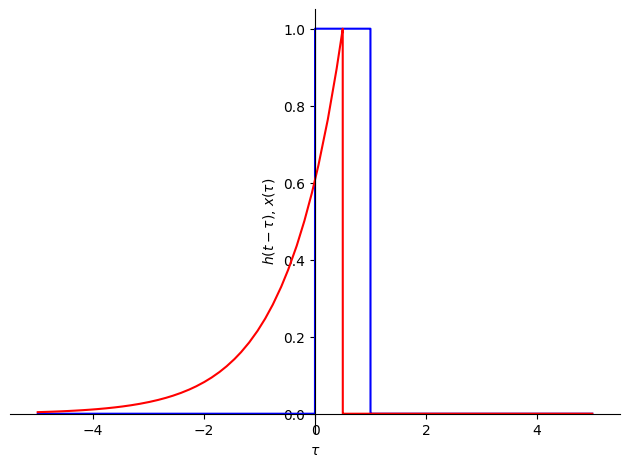

In [50]:
plot_signals(tau, x1, h3.subs(t, 0.5), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

In [51]:
x = rect(t - 1/2)
x1=x.subs(t,tau)
x1

θ(τ) - θ(τ - 1.0)

Para el primer caso, t=-1

In [52]:

con1=sym.integrate(x1*h3.subs(t,-1),(tau,-sym.oo,sym.oo))
con1

0

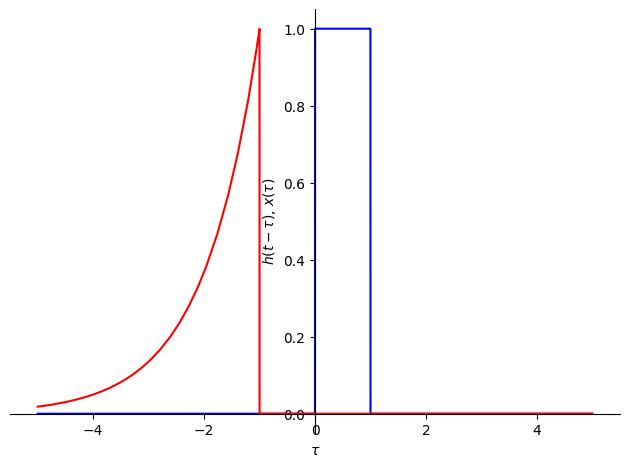

In [53]:
plot_signals(tau, x1, h3.subs(t, -1), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

Para el segundo caso, t=0.5

In [54]:
hh=sym.exp(-t+tau)
hh=hh.subs(t,0.5)
hh
con2=sym.integrate(hh,(tau,0,0.5))
con2

0.393469340287367

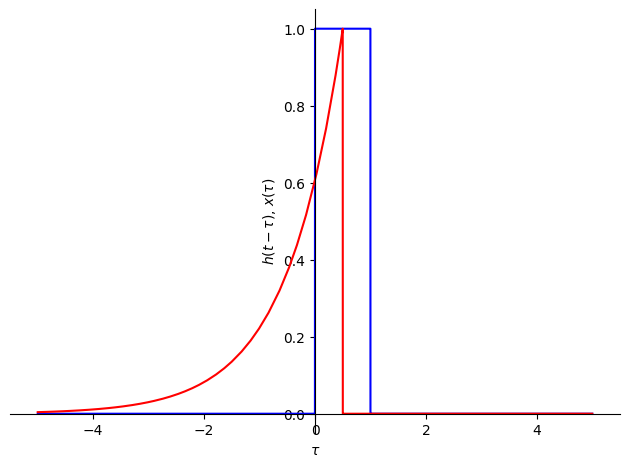

In [55]:
plot_signals(tau, x1, h3.subs(t,0.5), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

Para el tercer caso, t=1

In [56]:
hh=sym.exp(-t+tau)
hh=hh.subs(t,1)
con2=sym.integrate(hh,(tau,0,1))
con2

     -1
1 - ℯ  

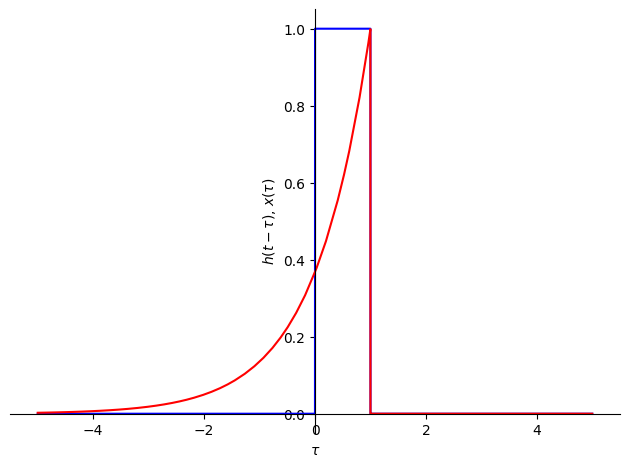

In [57]:
plot_signals(tau, x1, h3.subs(t, 1), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

Para los casos generales

In [65]:
c1=sym.integrate(sym.exp(tau-t),(tau,0,0))
c1

0

In [63]:
c2=sym.integrate(sym.exp(tau-t),(tau,0,t))
c2



     -t
1 - ℯ  

In [64]:
c3=sym.integrate(sym.exp(tau-t),(tau,0,1))
c3

 1 - t    -t
ℯ      - ℯ  